In [0]:
import numpy as np



## Basic Text Processing
### Loading dataset
You need not mess with this code. Just run these cells to download the data.

In [93]:
!wget https://raw.githubusercontent.com/krishnamrith12/NotebooksNLP/master/Data/Tokenization/Chat1.txt

--2019-06-21 05:03:40--  https://raw.githubusercontent.com/krishnamrith12/NotebooksNLP/master/Data/Tokenization/Chat1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5681 (5.5K) [text/plain]
Saving to: ‘Chat1.txt.1’

Chat1.txt.1         100%[===================>]   5.55K  --.-KB/s    in 0s      

2019-06-21 05:03:40 (55.6 MB/s) - ‘Chat1.txt.1’ saved [5681/5681]



In [94]:

import string
import matplotlib.pyplot as plt
import nltk
print('***********************************************************')
print('Your data successfully loaded.')
print('First 10 lines of conversation is shown:')
print('This is conversation between machine and user.')
print('***********************************************************')
with open("./Chat1.txt") as myfile:
  for x in range(0,10):
    print(next(myfile))


***********************************************************
Your data successfully loaded.
First 10 lines of conversation is shown:
This is conversation between machine and user.
***********************************************************


User: So how's it going? 

Hal: I am magnificent, Are you still keeping them guessing? 



User: I sure hope so! 

Hal: Yeah, I sure hope so too!



User: Did you miss me?

Hal: Yes, of course, I really missed you so much!





### Tokenize the data


Suppose you are doing operations on string data named '*str = I love CODING.*'

1.   Tokenize the data. For eg, output after this step will be ['I', 'love', 'CODING.']
2.   Lowercase the data . For ex, your output will be ['i' ,'love', 'coding.']
3. Remove the puctuations from data using . For eg, you will get output as ['i' ,'love', 'coding'] (Full stop is removed here). We have provided list of puctuations. So make sure that you remove all the punctuations. 


In [0]:
f = open('./Chat1.txt','r')
content=f.read()

# Punctuation list is as follows:
punc_list =['.',',',':','!','?','(',')',';']

In [96]:
def tokenize(raw_data):
  """
  Inputs:
    raw_data: string, raw text of the corpus
  Outputs:
    tokenized_data: list of strings, split raw_data on whitespace  
  """
  # YOUR CODE HERE
#   print(raw_data)
  tokenized_data=[]
#   print(raw_data[2:])
#   for line in raw_data.split("\n"):
  tokenized_data=raw_data.split()
  return tokenized_data  

tokenized_data = tokenize(content)
tokenized_data[0:5]

['User:', 'So', "how's", 'it', 'going?']

In [97]:
"""Test tokenize"""
def test_tokenize():
  assert(tokenized_data[0:5] == ['User:', 'So', "how's", 'it', 'going?'])
  assert(len(tokenized_data) == 1013)
  print('Test passed', '\U0001F44D')
test_tokenize()

Test passed 👍


In [0]:
def lowercase_data(word):
  """
  Inputs:
    word: a string
  Outputs:
    word_lowercase: a string (all alphabets in lowercase)
  """
  # YOUR CODE HERE
  word_lowercase=word.lower()
  return word_lowercase


In [99]:
"""Test lowercase_data"""
def test_lowercase_data():
  assert(lowercase_data('Machine LEArning is AWesome;') == 'machine learning is awesome;')
  print('Test passed', '\U0001F44D')
test_lowercase_data()

Test passed 👍


In [0]:
def remove_punctuation(word, punc_list):
  '''
  Inputs:
    punc_list: a list (containing punctuation characters)
    word: a string
  Outputs:
    word_no_punc: a string (without any punctuation characters)
  '''
  # YOUR CODE HERE
  curr=""
  for w in word:
    if w not in punc_list:
      curr+=w
  word_no_punc=curr
  return word_no_punc

In [101]:
"""Test remove_punctuation"""
def test_remove_punctuation():
  assert(remove_punctuation('mac.hin;e le,ar.ning is? awe!some;', punc_list) == 'machine learning is awesome')
  assert(remove_punctuation(tokenized_data[4], punc_list) == 'going')
  print('Test passed', '\U0001F44D')
test_remove_punctuation()

Test passed 👍


In [0]:
def preprocess(content):
  """
  Inputs:
    content: a string
  Outputs:
    wordlist: a list of strings
    
  Action:
    1. Preprocess the string 'content' using the functions created above (tokenize, lowercase and remove_punctuation) 
    2. Store it in a list 'wordlist'
    
  """
  # YOUR CODE HERE
  content=tokenize(content)
  wordlist=[]
  for word in content:
    word=remove_punctuation(word, punc_list)
    word=lowercase_data(word)
    wordlist.append(word)
  return wordlist

wordlist = preprocess(content)

In [103]:
"""Test preprocess"""
def test_preprocess():
  assert(len(wordlist) == 1013)
  print('Test passed', '\U0001F44D')
test_preprocess()

Test passed 👍


### Plot the frequency of words
You need to plot the frequncy of words using function provided. <br>


In [0]:
def plot_frequency(y):
  N = len(y)
  x = range(N)
  width = 1/0.5
  plt.bar(x, y, width, color="blue")
  plt.show()


### To do
1) Find out count of each word using  function and store this  in list named word_count using <br>
2) Pass the word_count list to function to plot the frequency plot.


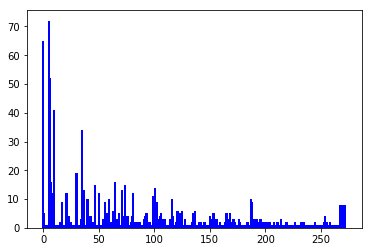

In [105]:
def frequency(wordlist):
  """
  Inputs:
    wordlist: a list of string
  Outputs:
    word_count: a list, frequency of all the items in wordlist
  """
  # YOUR CODE HERE
  d={}
  for word in wordlist:
    if word not in d.keys():
      d[word]=1
    else:
      d[word]+=1
  word_count=list(d.values())
  return word_count
word_count = frequency(wordlist)
plot_frequency(word_count)

In [106]:
"""Test frequency"""

'Test frequency'

## (1) Cosine Similarity
When we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

We can think of n-dimensional vectors as points in n-dimensional space. If we take this perspective, *L1* and *L2* Distances help quantify the amount of space "*we must travel"* to get between these two points. 

Another approach is to examine the angle between two vectors. Instead of computing the actual angle, we can leave the similarity in terms of  similarity=cos(Θ) . Formally, the Cosine Similarity  s  between two vectors  p  and  q  is defined as:

$s = \frac{p⋅q}{||p||||q||} $, where s∈[−1,1]<br>
You need to implement this function.

In [0]:
import math
def cosine_similarity(v1,v2):
    """
    Input:
        v1: list of floats,
        v2: list of floats, same length as v1
        
    Output:
        cs: single floating point value, cosine similarity of v1 and v2 as defined above
        /
    """
    # YOUR CODE HERE
    v1=np.array(v1)
    v2=np.array(v2)    
    dot = np.dot(v1, v2)
    nv1 = np.linalg.norm(v1)
    nv2 = np.linalg.norm(v2)
    cs = dot / (nv1 * nv2)
    return cs

In [108]:
'''test for cosine_similarity'''
v1,v2 = [3, 45, 7, 2], [2, 5.4, 13, 15]
v = cosine_similarity(v1,v2)
assert np.isclose(v, 0.39187288174224344, 0.0001)

print('Test passed', '\U0001F44D')

Test passed 👍


### Most similar word
Implement the function, given a word "*x*", it will return most similar word from first column of data, based on similarity measure. <br>
For example, for most similar word to *king* could be *man*. <br>

In [0]:
def most_similar(input_word,wordvec_dict):
  """
  Input:
      input_word: any word
      wordvec_dict: dictionary of word vectors(list of floats), where a word is the key and its word_vector is the value
      
  Output:
      out: string, the word in wordvec_dict most similar to 'word'
  """
  # YOUR CODE HERE
  cs=0.1**(20)
  out=""
  for key in wordvec_dict.keys():
    if key != input_word:
      temp=cosine_similarity(wordvec_dict[input_word],wordvec_dict[key])
      if temp>cs:
        cs=temp
        out=key
  return out

In [116]:

word_vec_dict = {
    'princess': [-1.720603,	-3.560657],
    'queen': [-0.722603,	-1.232549],
    'man':	[-0.370373,	0.576843],
    'boy':	[-1.693504,	0.719822]

}

'''test for most_similar'''
assert most_similar('queen', word_vec_dict) == 'princess'
print('Test passed', '\U0001F44D')

Test passed 👍
